In [9]:
import numpy as np
import pandas as pd
import seaborn as sn
sn.set(style="white", color_codes=True)

In [10]:
import matplotlib.pyplot as mp
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [11]:
#from subprocess import check_output
#print(check_output(["ls", "D:\Dev\Python Workspace\PyCharm\sentimentalAnalysis\venv\Datasets"]).decode("utf8"))
movie_data = pd.read_csv(r"D:\Dev\Python Workspace\PyCharm\sentimentalAnalysis\venv\Datasets\movie_metadata.csv"
                        , encoding='utf-8')
movie_data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [4]:
movie_data.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [5]:
movie_data.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.258486,0.180674,0.271646,0.190016,0.480601,0.624943,0.263203,-0.033897,0.609387,0.119994,0.275707,0.282306,0.305303,-0.049786,0.683176
duration,0.258486,1.000000,0.173296,0.123558,0.088449,0.250298,0.314765,0.123074,0.013469,0.328403,0.074276,-0.135038,0.131673,0.261662,-0.090071,0.196605
director_facebook_likes,0.180674,0.173296,1.000000,0.120199,0.090723,0.144945,0.297057,0.119549,-0.041268,0.221890,0.021090,-0.063820,0.119601,0.170802,0.001642,0.162048
actor_3_facebook_likes,0.271646,0.123558,0.120199,1.000000,0.249927,0.308026,0.287239,0.473920,0.099368,0.230189,0.047451,0.096137,0.559662,0.052633,-0.003366,0.278844
actor_1_facebook_likes,0.190016,0.088449,0.090723,0.249927,1.000000,0.154468,0.192804,0.951661,0.072257,0.145461,0.022639,0.086873,0.390487,0.076099,-0.020049,0.135348
gross,0.480601,0.250298,0.144945,0.308026,0.154468,1.000000,0.637271,0.247400,-0.027755,0.559958,0.102179,0.030886,0.262768,0.198021,0.069346,0.378082
num_voted_users,0.624943,0.314765,0.297057,0.287239,0.192804,0.637271,1.000000,0.265911,-0.026998,0.798406,0.079621,0.007397,0.270790,0.410965,-0.014761,0.537924
cast_total_facebook_likes,0.263203,0.123074,0.119549,0.473920,0.951661,0.247400,0.265911,1.000000,0.091475,0.206923,0.036557,0.109971,0.628404,0.085787,-0.017885,0.209786
facenumber_in_poster,-0.033897,0.013469,-0.041268,0.099368,0.072257,-0.027755,-0.026998,0.091475,1.000000,-0.069018,-0.019559,0.061504,0.071228,-0.062958,0.013713,0.008918
num_user_for_reviews,0.609387,0.328403,0.221890,0.230189,0.145461,0.559958,0.798406,0.206923,-0.069018,1.000000,0.084292,-0.003147,0.219496,0.292475,-0.024719,0.400594


In [6]:
# Cleaning the data for all th NaN values.
movie_data.fillna(value=0, axis=1, inplace=True)

# Getting average values from the dataset.
movie_data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5.043000e+03,5.043000e+03,5043.000000,5043.000000,5043.000000,5.043000e+03,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000
mean,138.804283,106.882213,672.351576,642.068015,6550.941305,3.997226e+07,8.366816e+04,9699.063851,1.367638,271.634940,3.587432e+07,1959.585961,1647.496530,6.442138,2.075546,7525.964505
std,121.792053,25.828463,2785.871819,1661.808199,15012.315824,6.483779e+07,1.384853e+05,18163.799124,2.012180,377.603767,1.961555e+08,290.180846,4038.092967,1.125116,1.447089,19320.445110
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,5.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.600000,0.000000,0.000000
25%,48.000000,93.000000,6.000000,130.000000,611.000000,3.037815e+05,8.593500e+03,1411.000000,0.000000,64.000000,3.000000e+06,1998.000000,278.500000,5.800000,1.850000,0.000000
50%,109.000000,103.000000,45.000000,367.000000,986.000000,1.527968e+07,3.435900e+04,3090.000000,1.000000,155.000000,1.500000e+07,2005.000000,595.000000,6.600000,1.850000,166.000000
75%,194.000000,118.000000,189.000000,635.000000,11000.000000,5.135707e+07,9.630900e+04,13756.500000,2.000000,324.000000,4.000000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


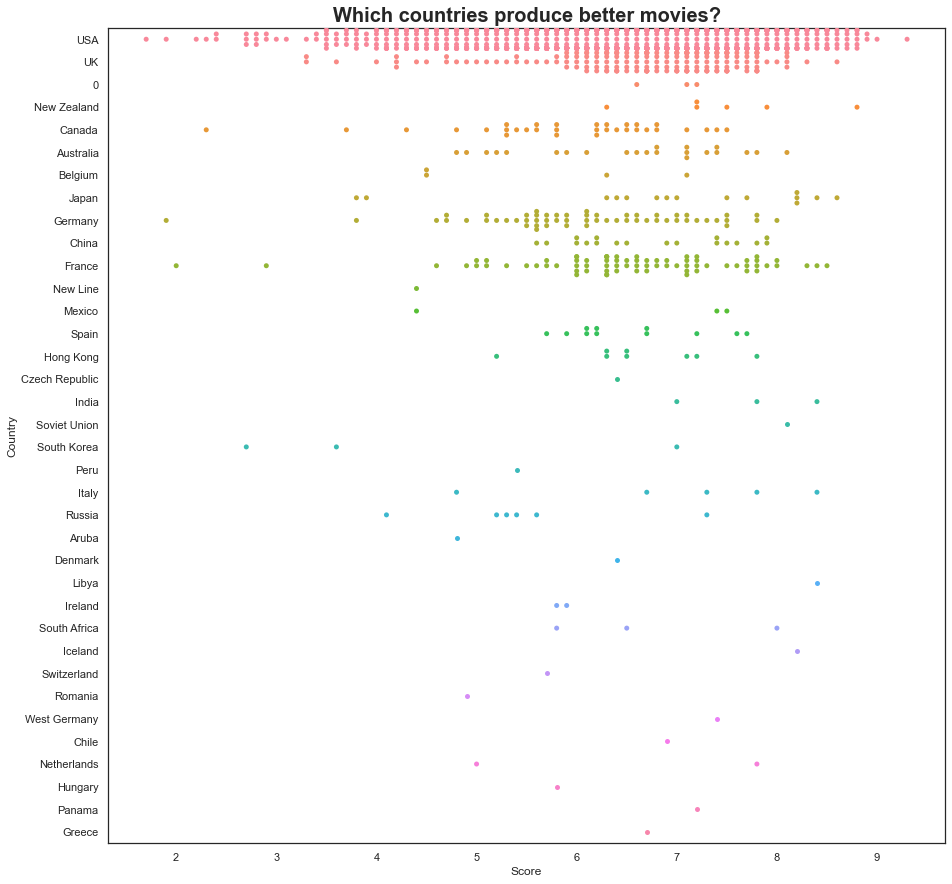

In [7]:
# Slicing the data in half for a clearer visualization.
movie_sliced = movie_data[0:2501]

# Building the plot
mp.figure(figsize=[15,15])
sn.swarmplot(x="imdb_score", y="country", data=movie_sliced)
mp.title("Which countries produce better movies?", fontsize=20,fontweight="bold")
mp.xlabel("Score")
mp.ylabel("Country")
mp.show()

In [8]:
list(movie_data)

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [70]:
movie_data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,0.0,Documentary,...,0.0,0,0,0,0.0,0.0,12.0,7.1,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,0.0,Comedy|Drama,...,6.0,English,Canada,0,0.0,2013.0,470.0,7.7,0.00,84
5039,Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,0.0,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,0.0,0.0,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,0.0,Drama|Horror|Thriller,...,3.0,English,USA,0,1400.0,2013.0,0.0,6.3,0.00,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,0.0,2012.0,719.0,6.3,2.35,660


In [71]:
# Remove spurious attributes
movie_data.drop(['color', 'language'], axis=1, inplace=True)

In [72]:
# Handle text attributes.
movie_data['director_name'].fillna('', inplace=True)

In [73]:
# Handle numberic attributes.
movie_data['gross'].fillna(0,inplace=True)

In [74]:
movie_data['budget'].fillna(0, inplace=True)

In [75]:
# Unify countries names
movie_data['country']=movie_data['country'].str.upper()
movie_data['country']=np.where(movie_data['country']=='UNITED STATES','USA',movie_data['country'])

In [76]:
# Bad data entry handling.
movie_data['director_name'] = np.where(movie_data['director_name']
                                       =='N/A', '', movie_data['director_name'])
movie_data['director_name'] = np.where(movie_data['director_name']
                                    =='Nan', '', movie_data['director_name'])
movie_data['director_name'] = np.where(movie_data['director_name']
                                    == 'Null', '', movie_data['director_name'])
movie_data['movie_title'] = movie_data['movie_title'].str.replace('Â', '')

In [77]:
# Handling outliers
movie_data['gross'] = movie_data['gross'].astype(float)
movie_data['duration'] = movie_data['duration'].astype(float)
movie_data['budget'] = movie_data['budget'].astype(float)

movie_data['duration'] = np.where(movie_data['duration']<=10, 0,movie_data['duration'])
movie_data['duration'] = np.where(movie_data['duration']>300, 0,movie_data['duration'])
movie_data['imdb_score'] = np.where(movie_data['imdb_score']<0, 0, movie_data['imdb_score'])
movie_data['title_year'] = np.where(movie_data['title_year']<2010,0,movie_data['title_year'])


In [78]:
# Normalize data
# Splitting actors
movie_data['actor1']=movie_data['actor_1_name']
movie_data['actor2']=movie_data['actor_2_name']
movie_data['actor3']=movie_data['actor_3_name']


In [79]:
movie_data.drop(columns=['actor_1_name','actor_2_name','actor_3_name',
                         'director_facebook_likes','actor_3_facebook_likes',
                         'actor_1_facebook_likes','actor_2_facebook_likes',
                         'aspect_ratio', 'plot_keywords','movie_imdb_link',
                         'num_voted_users',
                         
                        ], inplace=True)

list(movie_data)

['director_name',
 'num_critic_for_reviews',
 'duration',
 'gross',
 'genres',
 'movie_title',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'imdb_score',
 'movie_facebook_likes',
 'actor1',
 'actor2',
 'actor3']

In [81]:
# Add a new metric GOB(Gross Over Budget)

movie_data['GOB'] = movie_data.apply(
                    lambda row:
                    row['gross']/row['budget'] if row['budget'] != 0 else 0, axis=1
                    )
top_GOB = movie_data.sort_values('GOB', ascending=False).head(10)

In [82]:
top_GOB

,director_name,num_critic_for_reviews,duration,gross,genres,movie_title,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes,actor1,actor2,actor3,GOB
4793,Oren Peli,409.0,84.0,107917283.0,Horror,Paranormal Activity,330,0.0,1189.0,USA,R,15000.0,0.0,6.3,12000,Micah Sloat,Ashley Palmer,Amber Armstrong,7194.485533
4799,Jonathan Caouette,72.0,88.0,592014.0,Biography|Documentary,Tarnation,78,3.0,114.0,USA,Unrated,218.0,0.0,7.2,754,Greg Ayres,Jonathan Caouette,Renee Leblanc,2715.660550
4707,Daniel Myrick,360.0,81.0,140530114.0,Horror,The Blair Witch Project,399,0.0,3400.0,USA,R,60000.0,0.0,6.4,0,Heather Donahue,Joshua Leonard,Michael C. Williams,2342.168567
4984,Edward Burns,36.0,98.0,10246600.0,Comedy|Drama|Romance,The Brothers McMullen,388,0.0,36.0,USA,R,25000.0,0.0,6.6,265,Shari Albert,Michael McGlone,Maxine Bahns,409.864000
3278,Tobe Hooper,277.0,88.0,30859000.0,Horror|Thriller,The Texas Chain Saw Massacre,1094,0.0,826.0,USA,R,83532.0,0.0,7.5,0,Gunnar Hansen,Edwin Neal,Marilyn Burns,369.427285
4936,Tobe Hooper,277.0,88.0,30859000.0,Horror|Thriller,The Texas Chain Saw Massacre,1094,0.0,826.0,USA,R,83532.0,0.0,7.5,0,Gunnar Hansen,Edwin Neal,Marilyn Burns,369.427285
5035,Robert Rodriguez,56.0,81.0,2040920.0,Action|Crime|Drama|Romance|Thriller,El Mariachi,147,0.0,130.0,USA,R,7000.0,0.0,6.9,0,Carlos Gallardo,Peter Marquardt,Consuelo Gómez,291.560000
4956,Travis Cluff,159.0,81.0,22757819.0,Horror|Thriller,The Gallows,276,0.0,150.0,USA,R,100000.0,2015.0,4.2,0,Pfeifer Brown,Cassidy Gifford,Reese Mishler,227.578190
4977,Morgan Spurlock,193.0,100.0,11529368.0,Comedy|Documentary|Drama,Super Size Me,0,2.0,404.0,USA,PG,65000.0,0.0,7.3,0,Chemeeka Walker,Amanda Kearsan,Amelia Giancarlo,177.374892
2492,John Carpenter,318.0,101.0,47000000.0,Horror|Thriller,Halloween,4400,0.0,1191.0,USA,R,300000.0,0.0,7.9,12000,Jamie Lee Curtis,Donald Pleasence,P.J. Soles,156.666667


In [83]:
movie_data.to_csv('output_IMDB.csv')

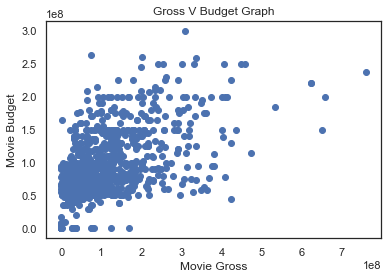

In [96]:
# Plotting 'Gross' versus 'Budget'
mp.scatter(
    movie_data['gross'].head(1000), 
    movie_data['budget'].head(1000), 
    #color=['orange','cyan'],
)
mp.xlabel('Movie Gross')
mp.ylabel('Movie Budget')
mp.title("Gross V Budget Graph")
mp.show()
